In [2]:
%matplotlib notebook
%config IPCompleter.greedy=True

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# np.random.seed(19680801)

How to determine the probability of an event, given that we have some prior knowledge?
Event A is our event of interest while event B represents the event that embodies our prior knowledge.

P(A|B) = P(A intersection B) / P(B)

P(A|B) - probability of event A when limiting your view to space where only B events happen.
= no:of possible events / all possible events
= P(A and B) / P(B)

B - **reduced sample space**

P(A and B), and P(B) are computed on original sample space

A and B is called **joint event** and P(A and B) is called **joint probability**

Marginal Probability - ?

### Law of total probability

When the sample space is partitioned into B1, B2, ... Bn such that <br/>
Union Bi; 1<=i<=n = S <br/> 
Intersection of Bi and Bj = null; 1<=i<n 1<=j<=n <br/>

P(A) = P(A n S) = P(A n (B1 U B2 U .. Bn)) <br/>
= P(A n B1) + P(A n B2) + ..  + P(A n Bn) <br/>
= P(A|B1)P(B1) + P(A|B2)P(B2) + ... + P(A|Bn)P(Bn)

### Bayes Theorem:

Intuition: New evidence should not shape our beliefs but should only update them.

P(H|E) = P(H)P(E|H) / (P(H)P(E|H) + P(not H)P(E|not H))


H      - Hypothesis, your belief

E      - Evidence

P(H)   - prior; your belief quantified before seeing the evidence

P(H|E) - posterior - you updated belief (quantified) after seeing the evidence

P(E|H) - Likelyhood - Probability of evidence being true when you limit your view to only hypothesis

## Bernouli's sequence
Sequence of independent experiments which have only two outcomes, success 1 (probability p) and failure 0 (probability 1-p)
### Binomial Probability Law
Out of M experiments, probability of k successess = $\left ( {M \atop k} \right )p^k(1-p)^{M-k}$
### Geometric Probability Law
probability of first success at experiment / trail k = $(1-p)^{k-1}p$

<IPython.core.display.Javascript object>


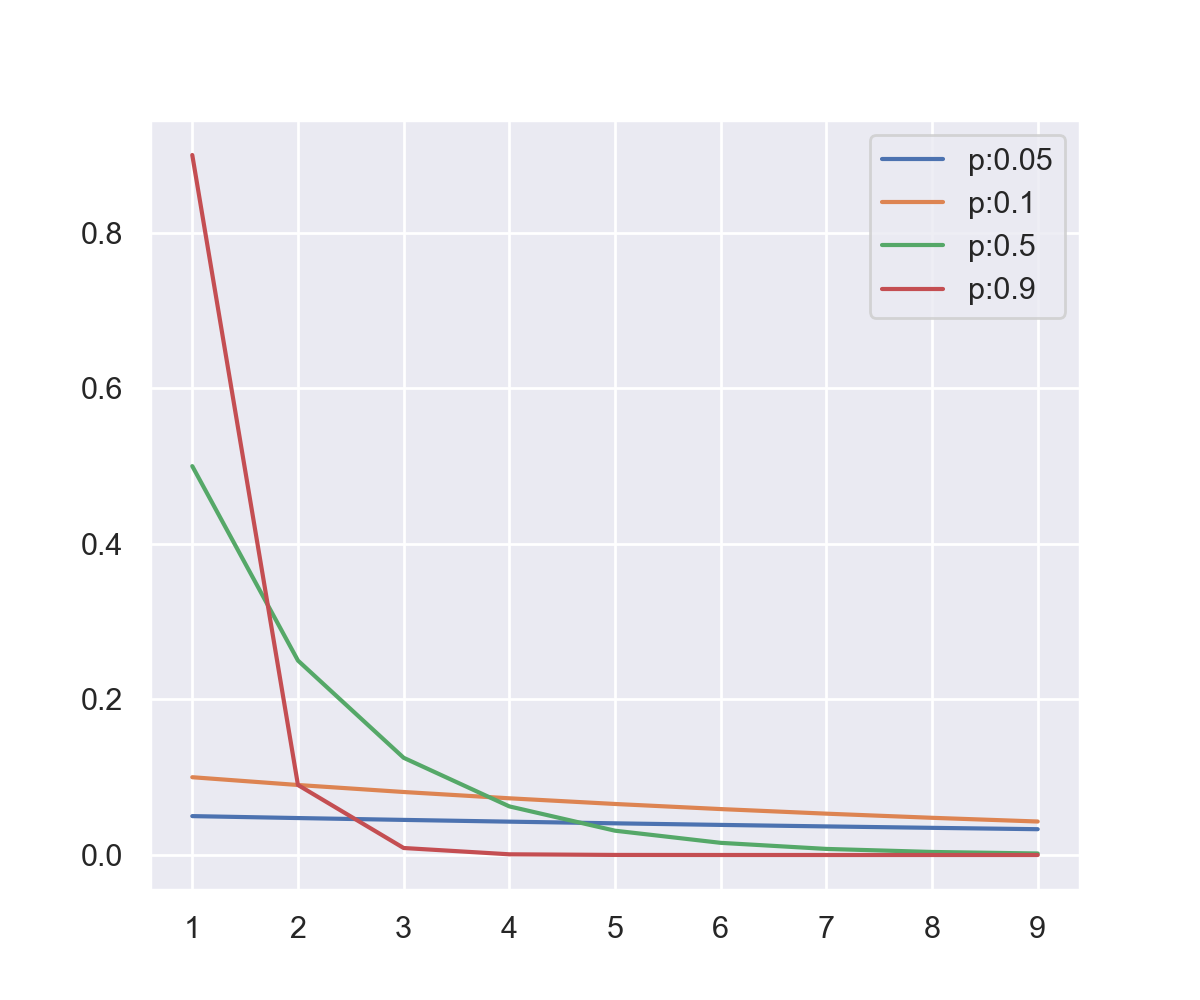

Text(0.5, 1.0, '')

In [7]:
def geometric_probability(k,p):
    return p * ((1-p)**(k-1))
fig, ax = plt.subplots(1, 1, sharex="col", sharey="row", figsize=(6,5))

k = np.arange(1,10)

for p in [0.05,0.1,0.5,0.9]:
    ax.plot(k, [geometric_probability(i, p) for i in k], label='p:%s'%(p,))
    
ax.legend()
ax.set_title('')

No matter how small the p is, the probability that success occurs on first trail is always the highest. This counterintuitive result is because as the number of trails increases, the number of constraints increases, where as the first trail has only one constraint

example: p > (1-p)(1-p)p

<IPython.core.display.Javascript object>


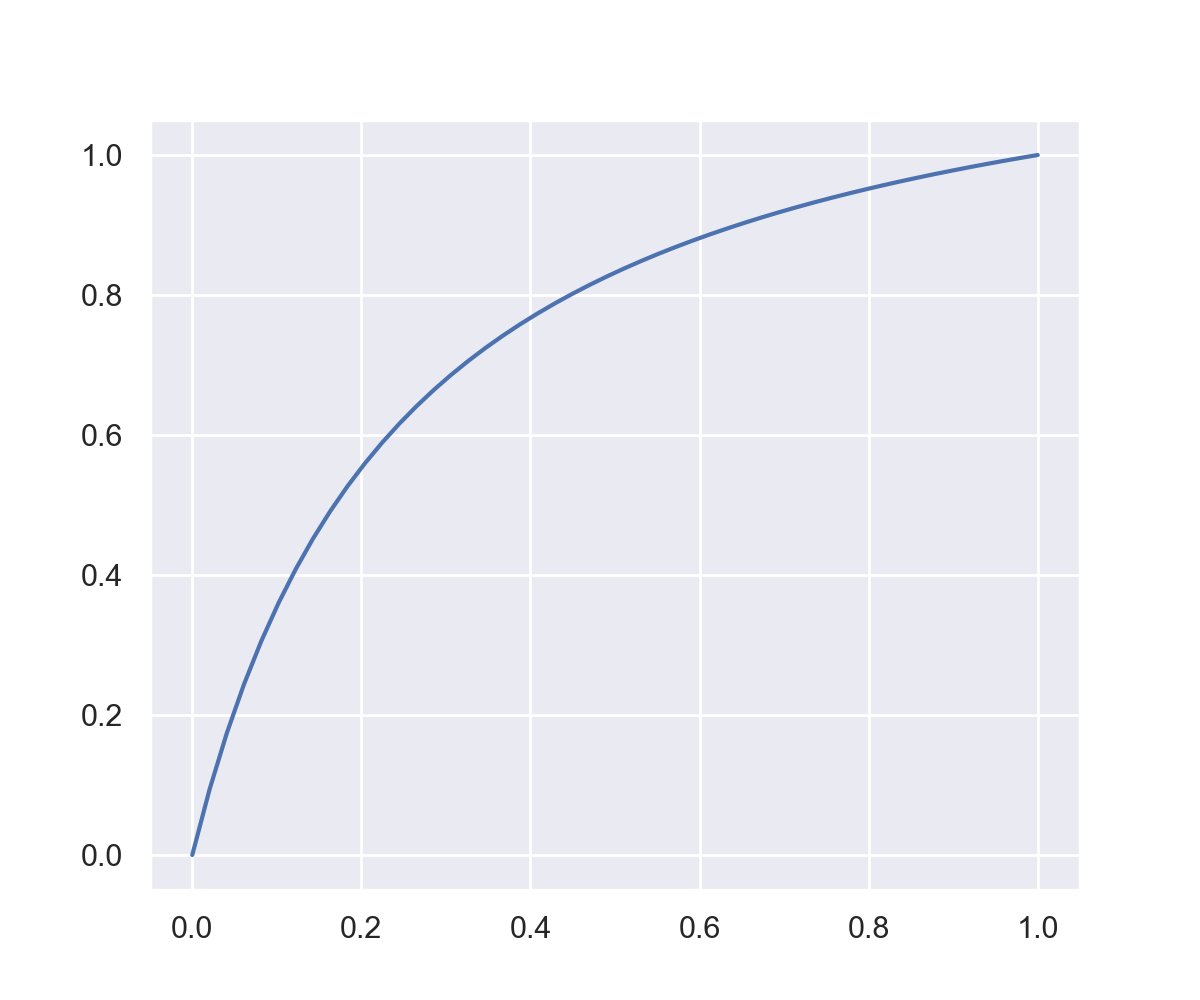

In [20]:
p = np.linspace(0,1)
posterior = lambda p: 0.99*p/(0.2 + 0.79*p)

fig, ax = plt.subplots(1, 1, sharex="col", sharey="row", figsize=(6,5))
ax.plot(p, [posterior(i) for i in p])

### (4.25) A fair coin is tossed 10 times. What is the probability of a run of exactly 5 heads in a row? Do not count runs of 6 or more heads in a row. Now verify your solution using a computer simulation.

In [53]:
n = 100000 # no:of experiments
k = 10    # no:of random events
x = np.random.random_sample((n,k)) # each row will be 1000 runs of one experiment
heads = x>0.5

num_5_heads_in_a_row = 0

for i in range(n):
    if np.sum(heads[i]) != 5:
        continue
    x=0
    for j in range(k):
        if heads[i][j]:
            x = x + 1
        else:
            x=0
        if x == 5:
            num_5_heads_in_a_row = num_5_heads_in_a_row + 1
            
print('simulation', num_5_heads_in_a_sequence/n)

print('theoritical', 6*(2**-10))

simulation 0.00578
theoritical 0.005859375


### (4.26)
probability to get right 8 times out of 10 if she is guessing (50% each case) = 8 heads out of 10 coin tosses = $(10 C 8)*(0.5^{10})$ <br/>

In [57]:
45/(2**10)

0.0439453125

### (4.27) <br/>

Binomial curve peaks at expected value. 

expected value  = p*10

to peak at 3 => p = 0.3

### (4.28) <br/>

M=5; k1=3, k2=2, k3 = 0; p = $(5!/(3!*2!))*p1^3*p2^2$ <br/>
M=5; k1=3, k2=0, k3 = 2; p = $(5!/(3!*2!))*p1^3*p3^2$ <br/>
M=5; k1=3, k2=1, k3 = 1; p = $(5!/(3!))*p1^3*p2*p3$ <br/>

p = $(5!/3!)*(p1^3)*(p2^2/2 + p3^2/2 + p2*p3)$ <br/>
p = 4*5 * 0.5^3 * (0.25^2 + 0.25^2)

In [60]:
4*5 * 0.5**3 * (0.25**2 + 0.25**2), 5/16

(0.3125, 0.3125)

In [59]:
# 0 <= x < 0.5 success
# 0.5 <= x < 0.75 failure
# 0.75 <= x <= 1 don't know

n = 100000 # no:of experiments
k = 5    # no:of random events
x = np.random.random_sample((n,k)) # each row will be 1000 runs of one experiment

success = x < 0.5

num_successes = np.sum(success, axis=1)
num_successes_3 = np.sum(num_successes == 3)

print(num_successes_3/n)

0.31226


### (4.30)

f - b = 2

f + b = 10

f = 6, b = 4

p = binomial_probability(10, 6, 0.5)

In [61]:
from scipy.special import comb
def binomial_probability(M,k,p):
    return comb(M,k) * (p**k) * ((1-p)**(M-k))
print(binomial_probability(10, 6, 0.5))

0.205078125


### (4.33)

one success out of k-1 trails and second success at k

$\left ( {k-1 \atop 1} \right )p(1-p)^{k-2} * p$

$(k-1)*(1-p)^{k-2}p^{2}$